In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_excel('Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()/df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
df[ df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#RFM Model=Recency,Frequency ,Monetary
df['Amount']=df['UnitPrice']*df['Quantity']

In [ ]:
monetary=pd.DataFrame(df.groupby('CustomerID')['Amount'].sum()).reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#Frequency
freq=pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].count()).reset_index()
freq

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [ ]:
monetary.shape

(4372, 2)

In [ ]:
recency=df.loc[:,['CustomerID','InvoiceDate']]
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00


In [ ]:
maxi=max(recency['InvoiceDate'])
maxi

Timestamp('2011-12-09 12:50:00')

In [ ]:
df.describe(include='datetime64')

<ipython-input-18-136f79f1d4c6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64')


,InvoiceDate
count,406829
unique,20460
top,2011-11-14 15:27:00
freq,543
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


In [ ]:
maxi=maxi+pd.DateOffset(1)

In [ ]:
recency['diff']=maxi-recency['InvoiceDate']
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [ ]:
recency=pd.DataFrame(recency.groupby('CustomerID')['diff'].min()).reset_index()
recency

,CustomerID,diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4367,18280.0,278 days 02:58:00
4368,18281.0,181 days 01:57:00
4369,18282.0,8 days 01:07:00
4370,18283.0,4 days 00:48:00


In [ ]:
#RFM
rfm=monetary.merge(freq,how='inner',on='CustomerID')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
rfm=rfm.merge(recency,on='CustomerID')
rfm.head()

,CustomerID,Amount,InvoiceNo,diff
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


<Axes: ylabel='Amount'>

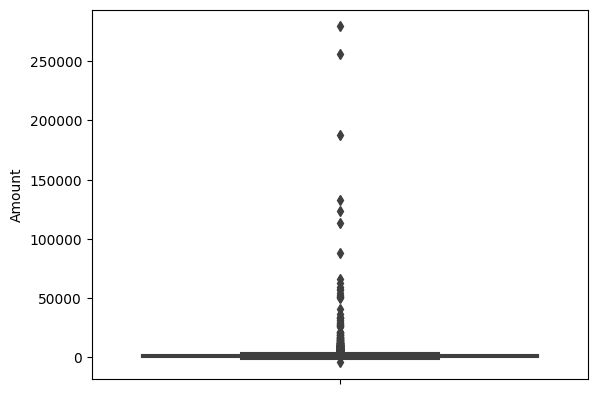

In [ ]:
sns.boxplot(y=rfm['Amount'])

In [ ]:
Q1=np.percentile(rfm['Amount'],25)
Q3=np.percentile(rfm['Amount'],75)
iqr=Q3-Q1

In [ ]:
rfm=rfm[(rfm['Amount']<Q3+1.5*iqr) & (rfm['Amount']>Q1-1.5*iqr)]

<Axes: ylabel='Amount'>

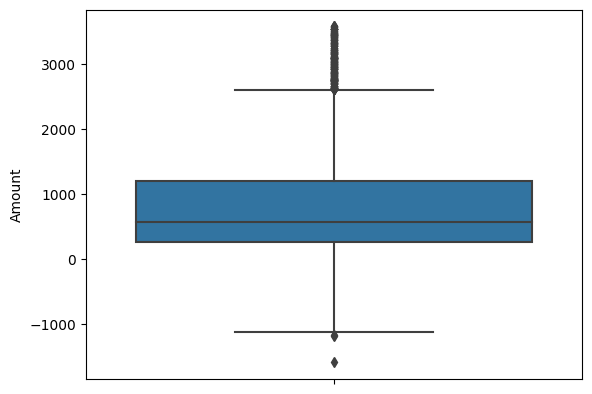

In [ ]:
sns.boxplot(y=rfm['Amount'])

In [ ]:
Q1=np.percentile(rfm['InvoiceNo'],25)
Q3=np.percentile(rfm['InvoiceNo'],75)
iqr=Q3-Q1

In [ ]:
rfm=rfm[(rfm['InvoiceNo']<Q3+1.5*iqr) & (rfm['InvoiceNo']>Q1-1.5*iqr)]

<Axes: ylabel='InvoiceNo'>

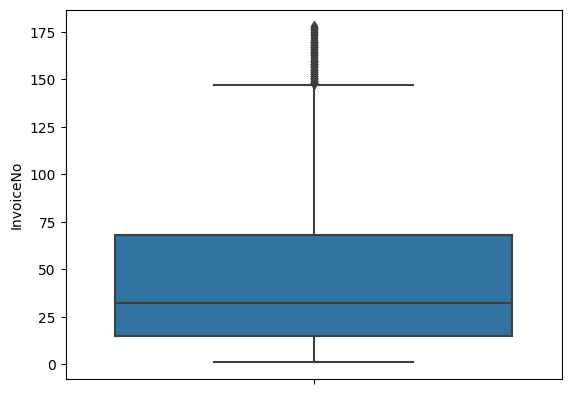

In [ ]:
sns.boxplot(y=rfm['InvoiceNo'])

In [ ]:
Q1=np.percentile(rfm['diff'],25)
Q3=np.percentile(rfm['diff'],75)
iqr=Q3-Q1
rfm=rfm[(rfm['diff']<Q3+1.5*iqr) & (rfm['diff']>Q1-1.5*iqr)]

In [ ]:
from sklearn.preprocessing import StandardScaler
rfm=rfm.drop('CustomerID',axis=1)

In [ ]:
scaler=StandardScaler()
rfm['diff']=rfm['diff'].dt.days
temp=rfm
rfm=pd.DataFrame(scaler.fit_transform(rfm),columns=rfm.columns)
rfm.head()

,Amount,InvoiceNo,diff
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


In [ ]:
from sklearn.cluster import KMeans
kmean=KMeans(5,max_iter=50)
kmean.fit(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [ ]:
from sklearn.metrics import silhouette_score
sse=[]
for k in range(2,15):
  kmean=KMeans(n_clusters=k)
  kmean.fit(rfm)
  sse.append(silhouette_score(rfm,labels=kmean.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

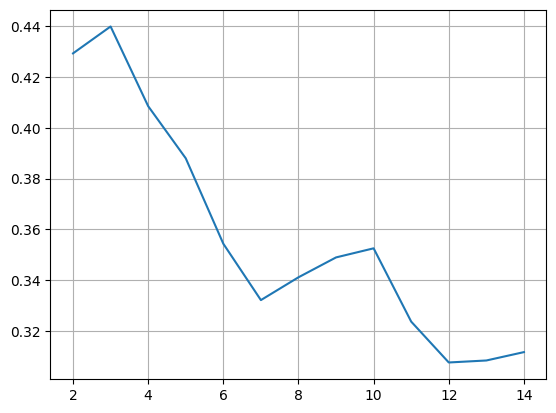

In [ ]:
sns.lineplot(x=np.arange(2,15),y=sse)
plt.grid()

In [ ]:
#ssd or wcss
ssd=[]
for k in np.arange(2,21):
  kmean=KMeans(n_clusters=k)
  kmean.fit(rfm)
  ssd.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

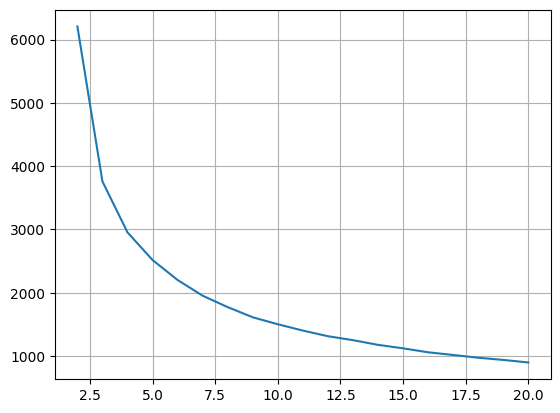

In [ ]:
sns.lineplot(x=np.arange(2,21),y=ssd)
plt.grid()

In [ ]:
kmean=KMeans(5,max_iter=50)
kmean.fit(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [ ]:
#method 1 of reseting indexes
rfm_km=pd.concat([temp.reset_index(),pd.DataFrame(kmean.labels_)],axis=1)
print(rfm_km.shape)
rfm_km.head()

(3697, 5)


,index,Amount,InvoiceNo,diff,0
0,0,0.00,2,326,1
1,2,1797.24,31,75,4
2,3,1757.55,73,19,4
3,4,334.40,17,310,1
4,5,1545.41,95,36,0


In [ ]:
rfm_km=rfm_km.drop('index',axis=1)
lst=list(rfm_km.columns)
lst[-1]='cluster_no'
rfm_km.columns=lst

In [ ]:
rfm_km.columns

Index(['Amount', 'InvoiceNo', 'diff', 'cluster_no'], dtype='object')

In [ ]:
amount_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['Amount'].mean()).reset_index()

In [ ]:
freq_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['InvoiceNo'].mean()).reset_index()

In [ ]:
diff_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['diff'].mean()).reset_index()

In [ ]:
rfm_mean=amount_mean.merge(freq_mean,on='cluster_no')
rfm_mean=rfm_mean.merge(diff_mean,on='cluster_no')

In [ ]:
rfm_mean

,cluster_no,Amount,InvoiceNo,diff
0,0,912.557139,114.021798,53.980926
1,1,327.037096,20.558856,262.393839
2,2,2471.402482,117.888283,38.198910
3,3,358.104633,23.355215,57.514953
4,4,1202.896078,53.698389,50.213763


<Axes: xlabel='cluster_no', ylabel='Amount'>

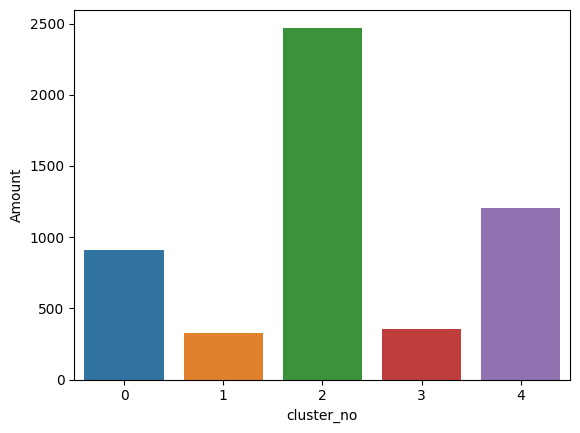

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['Amount'])

<Axes: xlabel='cluster_no', ylabel='diff'>

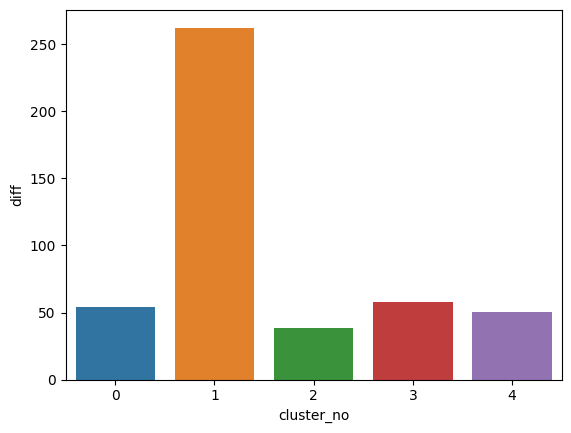

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['diff'])

<Axes: xlabel='cluster_no', ylabel='InvoiceNo'>

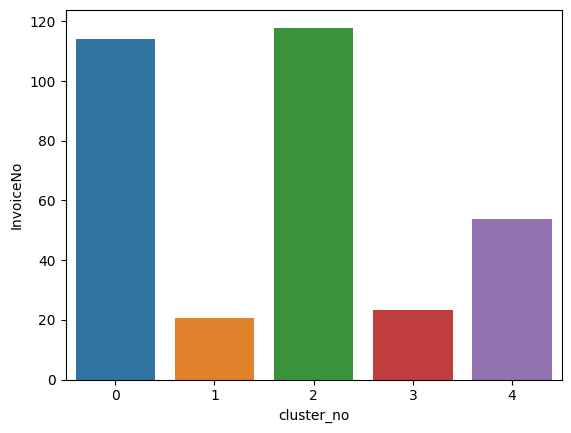

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['InvoiceNo'])

#Inference when we used 5 clusters

## 2nd type of cluster spend too much,their recency is very recent and their frequency of coming is very high

## 3rd type of clusters pay very less amount,their recency is also recent but their frequency of coming less

## 1st type of clusters pay very less amount their recency is very bad and their frequency of coming is also very low

## 0th type of clusters pay normal amount ,their recency is also recent and their frequency of coming is also very high

## 4th type of clusters pay 2nd highest amount in clusters ,their recency is also recent and their frequency of coming is good

In [ ]:
kmean=KMeans(3,max_iter=50)
kmean.fit(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [ ]:
rfm_km=pd.concat([temp.reset_index(),pd.DataFrame(kmean.labels_)],axis=1)
print(rfm_km.shape)
rfm_km.head()

(3697, 5)


,index,Amount,InvoiceNo,diff,0
0,0,0.00,2,326,2
1,2,1797.24,31,75,1
2,3,1757.55,73,19,0
3,4,334.40,17,310,2
4,5,1545.41,95,36,0


In [ ]:
rfm_km=rfm_km.drop('index',axis=1)
lst=list(rfm_km.columns)
lst[-1]='cluster_no'
rfm_km.columns=lst

In [ ]:
amount_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['Amount'].mean()).reset_index()

In [ ]:
freq_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['InvoiceNo'].mean()).reset_index()

In [ ]:
diff_mean=pd.DataFrame(rfm_km.groupby('cluster_no')['diff'].mean()).reset_index()

In [ ]:
rfm_mean=amount_mean.merge(freq_mean,on='cluster_no')
rfm_mean=rfm_mean.merge(diff_mean,on='cluster_no')

In [ ]:
rfm_mean

,cluster_no,Amount,InvoiceNo,diff
0,0,1844.383415,109.586294,44.600254
1,1,557.908193,34.104393,52.327649
2,2,327.313029,20.686858,255.745380


<Axes: xlabel='cluster_no', ylabel='Amount'>

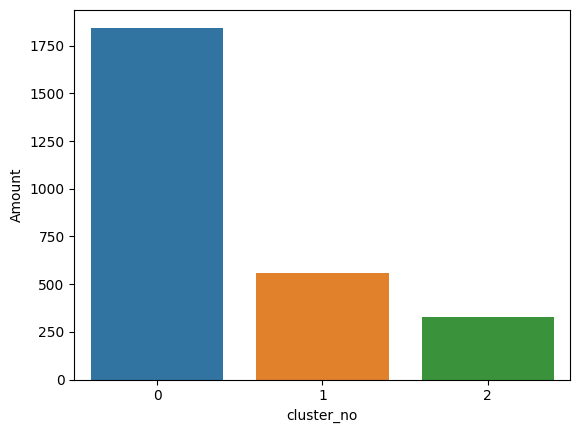

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['Amount'])

<Axes: xlabel='cluster_no', ylabel='diff'>

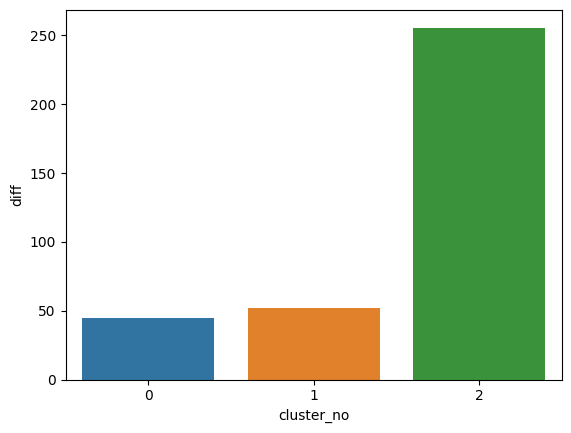

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['diff'])

<Axes: xlabel='cluster_no', ylabel='InvoiceNo'>

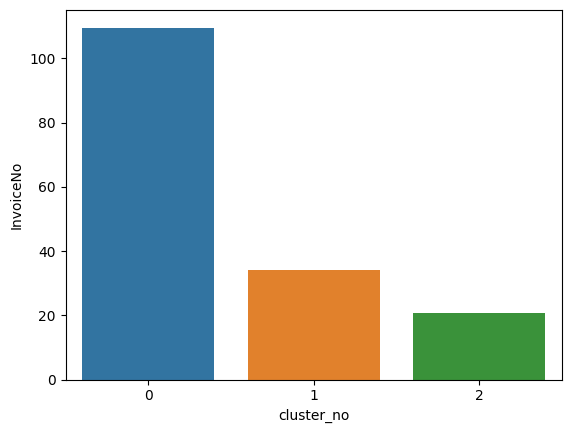

In [ ]:
sns.barplot(x=rfm_mean['cluster_no'],y=rfm_mean['InvoiceNo'])

#Inference when we used 3 clusters

## 1st type of customers spend too much,their recency is very recent and their frequency of coming is very high

## 2nd type of customers spend normal amount,their recency is also recent but their frequency of coming less

## 3rd type of customers pay very less amount their recency is very bad and their frequency of coming is also very low

In [ ]:
# Hierarcheal clustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
model.fit(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [ ]:
rfm_km=temp
rfm_km['labels']=model.labels_
rfm_km.head()

,Amount,InvoiceNo,diff,labels
0,0.00,2,326,0
2,1797.24,31,75,0
3,1757.55,73,19,4
4,334.40,17,310,0
5,1545.41,95,36,4


In [ ]:
grps=rfm_km.groupby('labels').mean().reset_index()
grps

,labels,Amount,InvoiceNo,diff
0,0,537.674996,31.954173,116.113584
1,1,-997.147143,6.142857,218.285714
2,2,2156.548333,28.666667,282.500000
3,3,1187.997778,135.222222,301.333333
4,4,1921.077738,119.333876,37.684039


<Axes: xlabel='labels', ylabel='Amount'>

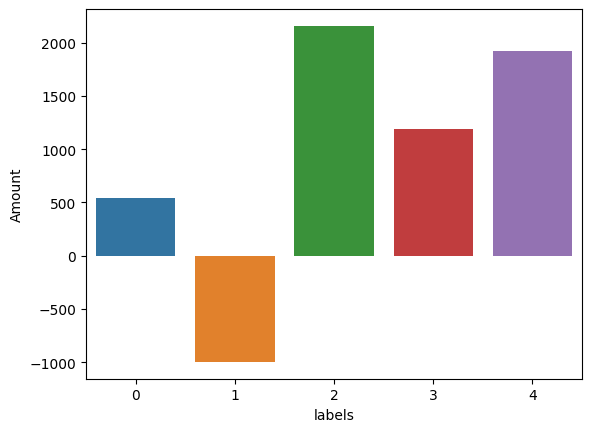

In [ ]:
sns.barplot(x=grps['labels'],y=grps['Amount'])

<Axes: xlabel='labels', ylabel='InvoiceNo'>

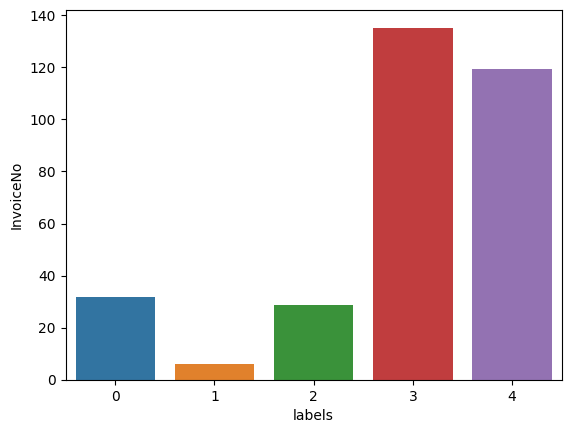

In [ ]:
sns.barplot(x=grps['labels'],y=grps['InvoiceNo'])

<Axes: xlabel='labels', ylabel='diff'>

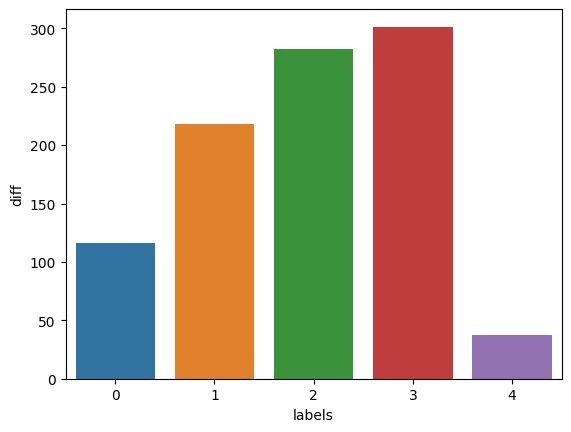

In [ ]:
sns.barplot(x=grps['labels'],y=grps['diff'])

In [ ]:
# 3 clusters
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
model.fit(rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
rfm_km=temp
rfm_km['labels']=model.labels_
rfm_km.head()

,Amount,InvoiceNo,diff,labels
0,0.00,2,326,1
2,1797.24,31,75,1
3,1757.55,73,19,0
4,334.40,17,310,1
5,1545.41,95,36,0


In [ ]:
grps=rfm_km.groupby('labels').mean().reset_index()
grps

,labels,Amount,InvoiceNo,diff
0,0,1910.487498,119.563403,41.492777
1,1,534.166258,31.895167,116.347159
2,2,2156.548333,28.666667,282.500000


<Axes: xlabel='labels', ylabel='Amount'>

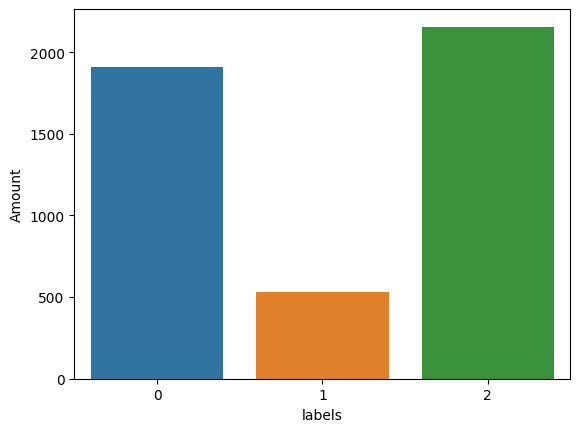

In [ ]:
sns.barplot(x=grps['labels'],y=grps['Amount'])

<Axes: xlabel='labels', ylabel='diff'>

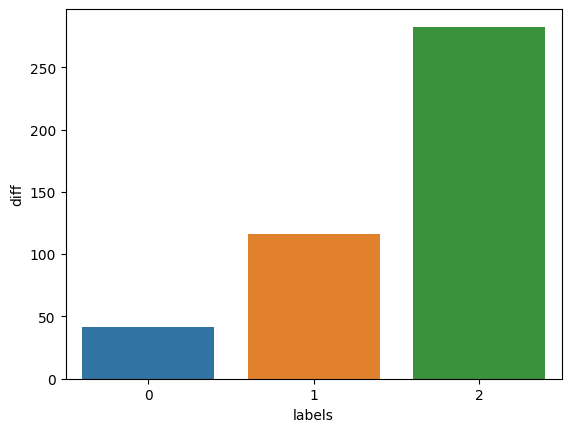

In [ ]:
sns.barplot(x=grps['labels'],y=grps['diff'])

<Axes: xlabel='labels', ylabel='InvoiceNo'>

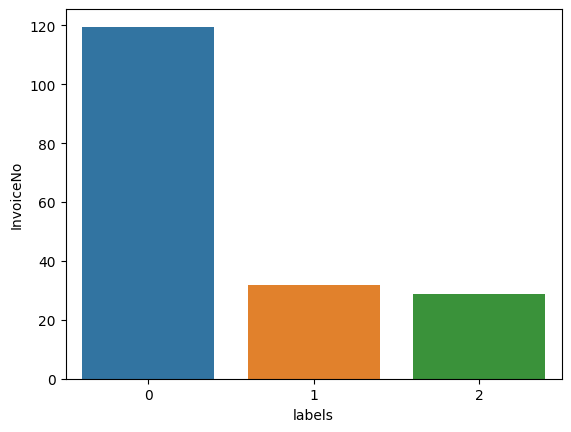

In [ ]:
sns.barplot(x=grps['labels'],y=grps['InvoiceNo'])